# Hebridean Whale and Dolphin Trust #
## Data Analysis ##

---
This notebook analyses the wrangled data created in the notebook

HWDT Data Wrangle.ipynb

--- 

Data provided by the following providers:<br><br>

<ul><li>Records provided by Hebridean Whale and Dolphin Trust, accessed through NBN Atlas website. (). For more information: email info@hwdt.org, or https://registry.nbnatlas.org/public/show/dp81</li><li>Hebridean Whale and Dolphin Trust (2022). Visual sightings data set 2003-2021. Occurrence dataset on the NBN Atlas (Creative Commons, with Attribution, Non-commercial v4.0 (CC-BY-NC) CC-BY-NC). For more information: email biodiversityofficer@hwdt.org, or https://registry.nbnatlas.org/public/show/dr537</li></ul>

---

## Imports

In [1]:
import pandas as pd
from datetime import datetime, date, time
#import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.models import NumeralTickFormatter
from bokeh.io import output_notebook
output_notebook()

import plotly.express as px

import seaborn as sns

import folium


Loading BokehJS ...

## Parameter setup

In [4]:
import_file = 'Data/export-2022.csv'
#export_file = 'Data/export-' #time stamp and .csv will be added at write stage

years = []
for f in range(2003,2022):
    years.append(str(f))

#col_to_drop = ["NBN Atlas record ID","Licence","Rightsholder","Occurrence status","Taxon author","Taxon Rank","Country","Recorder","Dataset ID","Data provider","Dataset name","Data provider ID",'Class','Order','Family','Kingdom','Basis of record','Species ID (TVK)','Institution code','Vitality','Identification verification status','Phylum','Genus']

## Import Data

In [40]:
dw = pd.read_csv(import_file, parse_dates=["Date"])

dw.head()

,Unnamed: 0,Occurrence ID,Scientific name,Common name,Date,Date day,Date month,Date year,OSGR,Latitude (WGS84),Longitude (WGS84),Coordinate uncertainty (m),Individual count,Life stage,OSGR 100km,OSGR 10km,OSGR 2km,OSGR 1km,Country
0,0,13277,Orcinus orca,Killer Whale,2019-12-20,20,12,2019,NM36,56.667782,-6.296667,1000.0,1.0,Adult,NM,NM36,NaN,NaN,Scotland
1,1,13273,Halichoerus grypus,Grey Seal,2019-11-26,26,11,2019,NM3966,56.720737,-6.260450,220.0,1.0,Adult,NM,NM36,NM36Y,NM3966,Scotland
2,2,13271,Phocoena phocoena,Common Porpoise,2019-11-26,26,11,2019,NM5976,56.815250,-5.942466,400.0,1.0,Adult,NM,NM57,NM57Y,NM5976,Scotland
3,3,14169,Delphinus delphis,Common Dolphin,2021-11-05,5,11,2021,NM2470,56.742290,-6.507234,150.0,1.0,Adult,NM,NM27,NM27K,NM2470,Scotland
4,4,13261,Phocoena phocoena,Common Porpoise,2019-11-25,25,11,2019,NM5175,56.805698,-6.072366,200.0,1.0,Adult,NM,NM57,NM57C,NM5175,Scotland


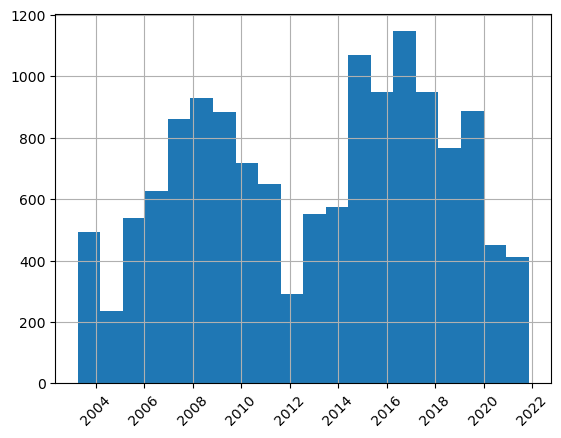

In [6]:
dw['Date'].hist(bins=20,xrot=45)
plt.show()

In [7]:
fig = px.histogram(dw, x='Date', nbins=20,text_auto=False, title="Observations over time", color='Common name')
fig.update_layout(yaxis_title='Observations', xaxis_title='')
fig.show()

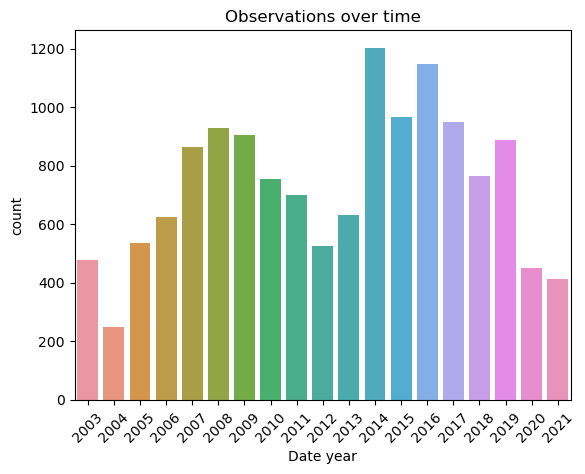

In [8]:
g = sns.countplot(data=dw,x='Date year')
g.set_xticklabels(labels=years,rotation=45)
plt.title("Observations over time")
plt.show()

In [58]:
dw_totals = dw.groupby(['Common name'])['Individual count'].agg(['sum','count'])
dw_totals.columns = ['Individual count','Observations']
dw_totals = dw_totals.reset_index()
dw_totals = dw_totals.sort_values(by='Individual count')

fig = px.bar(dw_totals,y='Common name', color='Individual count', x='Observations',text_auto=True)
fig.update_layout(title='Total Spotted Individuals')
fig.show()

Index(['sum', 'count'], dtype='object')


In [52]:
dw_totals

,Common name,sum,count
0,Atlantic White-sided Dolphin,108.0,4
1,Basking Shark,1979.0,1103
2,Bottle-nosed Dolphin,260.0,65
3,Common Dolphin,6949.0,934
4,Common Porpoise,10202.0,5990
5,Eurasian Otter,14.0,14
6,Fin Whale,2.0,2
7,Grey Seal,3216.0,2860
8,Harbour Seal,1883.0,1699
9,Humpback Whale,7.0,6


In [21]:
tmp = dw.groupby(['Common name',"Date year"])[['Individual count']].sum()
tmp = tmp.reset_index()
dw_yr_pv = tmp.pivot_table(index="Date year", columns='Common name', values='Individual count')
dw_yr_pv = dw_yr_pv.fillna(0)

dw_yr_pv = dw_yr_pv.reset_index()

In [22]:
dw_yr_pv

Common name,Date year,Atlantic White-sided Dolphin,Basking Shark,Bottle-nosed Dolphin,Common Dolphin,Common Porpoise,Eurasian Otter,Fin Whale,Grey Seal,Harbour Seal,Humpback Whale,Killer Whale,Leathery Turtle,Long-finned Pilot Whale,Minke Whale,Risso's Dolphin,Striped Dolphin,Sun-fish,White-beaked Dolphin
0,2003,0.0,83.0,29.0,50.0,415.0,0.0,0.0,78.0,40.0,0.0,1.0,0.0,0.0,87.0,42.0,1.0,2.0,7.0
1,2004,0.0,43.0,8.0,0.0,208.0,0.0,0.0,34.0,16.0,0.0,6.0,0.0,1.0,52.0,1.0,0.0,1.0,0.0
2,2005,0.0,111.0,5.0,73.0,609.0,0.0,0.0,99.0,76.0,0.0,15.0,0.0,0.0,42.0,10.0,0.0,8.0,0.0
3,2006,0.0,241.0,27.0,134.0,452.0,0.0,0.0,133.0,33.0,1.0,0.0,0.0,0.0,45.0,3.0,0.0,1.0,18.0
4,2007,0.0,130.0,29.0,392.0,834.0,0.0,0.0,169.0,50.0,1.0,9.0,0.0,0.0,52.0,25.0,0.0,5.0,95.0
5,2008,33.0,155.0,22.0,228.0,784.0,0.0,1.0,178.0,126.0,0.0,12.0,0.0,0.0,50.0,14.0,0.0,3.0,68.0
6,2009,75.0,199.0,14.0,265.0,662.0,0.0,0.0,238.0,145.0,1.0,4.0,0.0,0.0,65.0,20.0,0.0,2.0,107.0
7,2010,0.0,360.0,18.0,381.0,489.0,0.0,0.0,108.0,106.0,0.0,0.0,0.0,0.0,44.0,0.0,0.0,3.0,34.0
8,2011,0.0,52.0,2.0,780.0,594.0,0.0,1.0,199.0,65.0,0.0,0.0,1.0,0.0,73.0,15.0,0.0,2.0,149.0
9,2012,0.0,188.0,22.0,315.0,273.0,0.0,0.0,130.0,98.0,0.0,5.0,0.0,0.0,50.0,6.0,0.0,2.0,35.0


In [23]:
#df_dolphins = dw[dw['Common name'] == 'Common Porpoise']
#df_dolphins_grp_year = df_dolphins.groupby('Date year')[['Individual count']].sum()
fig = px.line(
    dw_yr_pv,
     x='Date year' , 
    y="Common Porpoise",
    title="Porpoises Spotted Over Time"
    )
fig.update_layout(
    yaxis_title='Count of Porpoises', 
    xaxis_title='', 
    showlegend=False
    )
fig.show()

In [24]:

fig = px.line(
    dw_yr_pv, 
    x='Date year' , 
    y=["Common Dolphin","Common Porpoise"], 
    title="Dolphins vs Porpoises Over Time",
    )
    
fig.update_layout(yaxis_title='Number Spotted', xaxis_title='', showlegend=True, legend_title='')
#fig.update_traces(line_dash="Common Dolphin")
fig.show()

In [15]:

#dw.loc[dw['Date'] > '2021-07-18': dw['Date'] < '2021-07-30']
tmp = dw.loc[dw['Date'] >= '2021-01-01']
tmp = tmp.loc[dw['Common name'] == "Risso's Dolphin"]
tmp

,Unnamed: 0,Occurrence ID,Scientific name,Common name,Date,Date day,Date month,Date year,OSGR,Latitude (WGS84),Longitude (WGS84),Coordinate uncertainty (m),Individual count,Life stage,OSGR 100km,OSGR 10km,OSGR 2km,OSGR 1km,Country
12763,12763,14110,Grampus griseus,Risso's Dolphin,2021-08-24,24,8,2021,NL72,56.28459,-7.190283,800.0,1.0,Adult,NL,NL72,NaN,NaN,Scotland
